# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score


# Step 1: Importing/Understanding Data

In [2]:
# reading in the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning Projects/HW1/heart.csv")

In [3]:
# displays first couple rows, so that we can see that our dataset is properly formatted
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# get all the columns in the dataset/datafram
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
# relates the features to their datatypes
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


# Step 2: Handling Missing Data

In [6]:
# which columns have a missing value?
df.isnull().any(axis=0)

,0
Age,False
Sex,False
ChestPainType,False
RestingBP,False
Cholesterol,False
FastingBS,False
RestingECG,False
MaxHR,False
ExerciseAngina,False
Oldpeak,False


In [7]:
# how many rows have a missing value?
df.isnull().any(axis=1).sum()

np.int64(0)

In [8]:
# proportion of missing values (for this case, since there are no missing values, all answers will be 0)
df.isna().sum()/df.shape[0]

,0
Age,0.0
Sex,0.0
ChestPainType,0.0
RestingBP,0.0
Cholesterol,0.0
FastingBS,0.0
RestingECG,0.0
MaxHR,0.0
ExerciseAngina,0.0
Oldpeak,0.0


In [9]:
# what percent of each column is missing? (again all 0, because no values are missing)
df_nan = round(100*df.isna().sum()/df.shape[0],2)
index = df_nan.index

pd.DataFrame({ '% NaN': df_nan}, index=index).T

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
% NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploring Data Characteristics

In [10]:
# statistics of the dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Data Transformations

In [11]:
# performing one hot encoding in order to give weight to the categorical data values
columnNames = df.columns

for column in ['ChestPainType', 'RestingECG', 'ST_Slope']:
  if(column in columnNames):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = df.drop(column, axis=1)
    df = df.join(dummies)

df.head()

# relates the **new** features to their datatypes
df.dtypes

,0
Age,int64
Sex,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64
HeartDisease,int64
ChestPainType_ASY,bool


In [12]:
# encoding categorical variables, so that we only have numerical
# changing female to 0, and male to 1
df.Sex = df.Sex.map({'F':0, 'M':1})

# changing N (No) to 0 and Y (Yes) to 1
df.ExerciseAngina = df.ExerciseAngina.map({'N':0, 'Y':1})

# changing False to 0 and True to 1
df.ChestPainType_ASY = df.ChestPainType_ASY.map({False:0, True:1})
df.ChestPainType_ATA = df.ChestPainType_ATA.map({False:0, True:1})
df.ChestPainType_NAP = df.ChestPainType_NAP.map({False:0, True:1})
df.ChestPainType_TA = df.ChestPainType_TA.map({False:0, True:1})

df.RestingECG_LVH = df.RestingECG_LVH.map({False:0, True:1})
df.RestingECG_Normal = df.RestingECG_Normal.map({False:0, True:1})
df.RestingECG_ST = df.RestingECG_ST.map({False:0, True:1})

df.ST_Slope_Down = df.ST_Slope_Down.map({False:0, True:1})
df.ST_Slope_Flat = df.ST_Slope_Flat.map({False:0, True:1})
df.ST_Slope_Up = df.ST_Slope_Up.map({False:0, True:1})

# to see the encoding changes
df.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [13]:
# normalizing data using standard scalar normalization
# I need to normalize data because logistic regression models are heavily affected by large ranges. This is because features that are on different scales can lead to biased coefficients
scaler = StandardScaler()

# dont want to scale 'HeartDisease' as that is the output, since we want HeartDisease values to only be 0 or 1, as log loss assumes so

target = df['HeartDisease']
features = df.drop('HeartDisease', axis=1)

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

df = pd.concat([features_scaled, target], axis=1)

df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.515952,0.410909,0.825070,-0.551341,1.382928,-0.823556,-0.832432,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,-1.002181,1.150674,0
1,-0.478484,-1.938163,1.491752,-0.171961,-0.551341,0.754157,-0.823556,0.105664,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,0.997824,-0.869056,1
2,-1.751359,0.515952,-0.129513,0.770188,-0.551341,-1.525138,-0.823556,-0.832432,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,-0.271448,-1.002181,1.150674,0
3,-0.584556,-1.938163,0.302825,0.139040,-0.551341,-1.132156,1.214246,0.574711,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,0.997824,-0.869056,1
4,0.051881,0.515952,0.951331,-0.034755,-0.551341,-0.581981,-0.823556,-0.832432,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,-0.271448,-1.002181,1.150674,0


# Variance Inflation Factor

In [14]:
# we want to find which features are heavily correlated. if a set of variables are heavily correlated, we can just keep one of those features, and drop the rest of them.
vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif.round(2)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,Age,1.40
1,Sex,1.12
2,RestingBP,1.12
3,Cholesterol,1.24
4,FastingBS,1.15
5,MaxHR,1.56
6,ExerciseAngina,1.59
7,Oldpeak,1.54
8,ChestPainType_ASY,inf
9,ChestPainType_ATA,inf


In [15]:
# we can see below that once we drop one feature from each category that had inf VIF, our VIF factor decreases to an acceptable value (generally VIF <= 5 is accepted)
df_fixed = df.drop(['ChestPainType_ASY', 'RestingECG_Normal', 'ST_Slope_Up'], axis=1)
vif_fixed = pd.DataFrame()
vif_fixed["features"] = df_fixed.columns
vif_fixed["VIF Factor"] = [variance_inflation_factor(df_fixed.values, i) for i in range(df_fixed.shape[1])]
vif_fixed.round(2)

,features,VIF Factor
0,Age,1.40
1,Sex,1.12
2,RestingBP,1.12
3,Cholesterol,1.24
4,FastingBS,1.15
5,MaxHR,1.56
6,ExerciseAngina,1.59
7,Oldpeak,1.54
8,ChestPainType_ATA,1.53
9,ChestPainType_NAP,1.29


# Visualizations

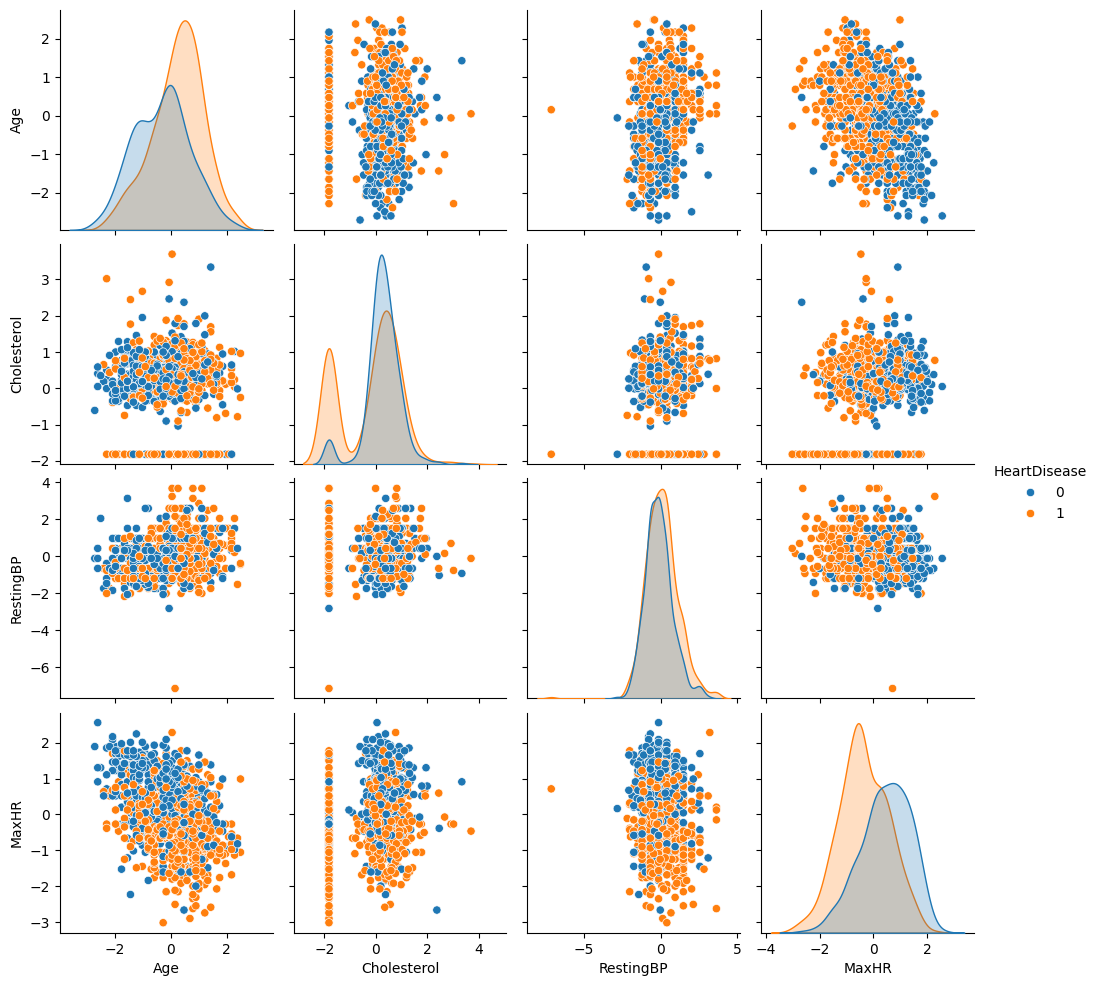

In [16]:
# ploting pairwise relationships in the dataset
# I only chose a small subset, as there a lot of features, and it would be hard to look at for analyzing and grading purposes
# if I left all of those graphs
df = df.drop(['ChestPainType_ASY', 'RestingECG_Normal', 'ST_Slope_Up'], axis=1)
subsetFeatures = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']
sns.pairplot(df[subsetFeatures + ['HeartDisease']], diag_kind='kde', hue='HeartDisease')

In [17]:
# displays first couple rows, so that we can see that our dataset is properly formatted
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,HeartDisease
0,-1.433140,0.515952,0.410909,0.825070,-0.551341,1.382928,-0.823556,-0.832432,2.075177,-0.532838,-0.229679,-0.507478,-0.490449,-0.271448,-1.002181,0
1,-0.478484,-1.938163,1.491752,-0.171961,-0.551341,0.754157,-0.823556,0.105664,-0.481887,1.876744,-0.229679,-0.507478,-0.490449,-0.271448,0.997824,1
2,-1.751359,0.515952,-0.129513,0.770188,-0.551341,-1.525138,-0.823556,-0.832432,2.075177,-0.532838,-0.229679,-0.507478,2.038947,-0.271448,-1.002181,0
3,-0.584556,-1.938163,0.302825,0.139040,-0.551341,-1.132156,1.214246,0.574711,-0.481887,-0.532838,-0.229679,-0.507478,-0.490449,-0.271448,0.997824,1
4,0.051881,0.515952,0.951331,-0.034755,-0.551341,-0.581981,-0.823556,-0.832432,-0.481887,1.876744,-0.229679,-0.507478,-0.490449,-0.271448,-1.002181,0


<Axes: >

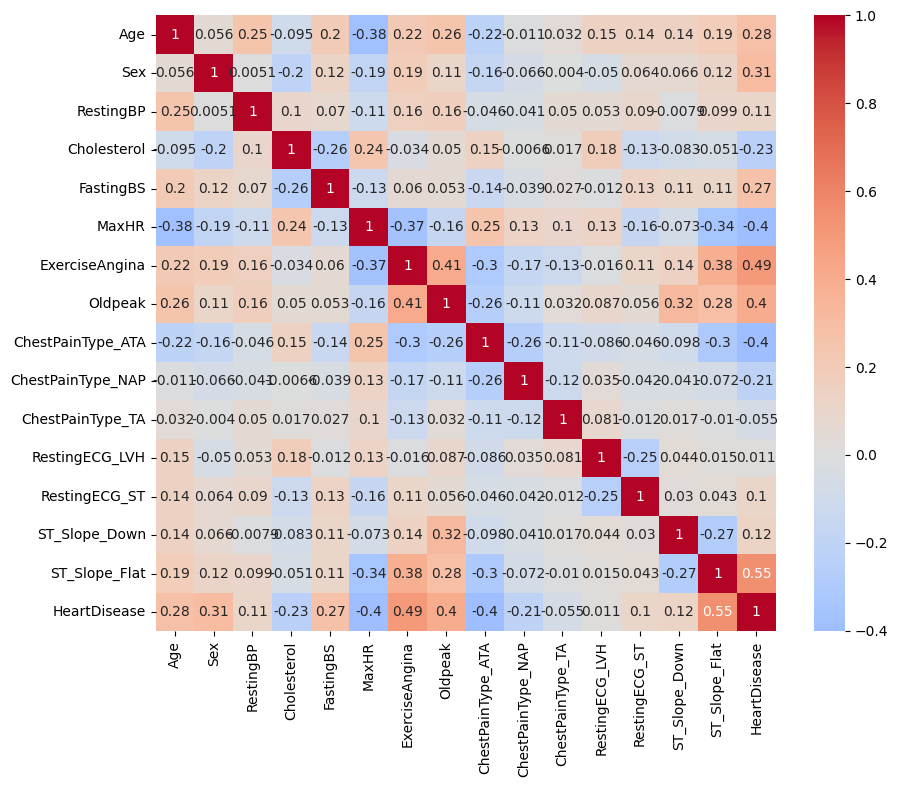

In [18]:
# helps us find highly correlated features. We can see after standardizing, encoding, and removing redundant features,
# the only high correlation is between the same variable (ex: age and age), which is expected.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)

# Findings

The goal of this project is to be able to create a model that can accurately diagnose a patient with heart disease. With around 80% of Americans eating fast food weekly, a lot of Americans are at risk for heart disease. This projects aims to provide a simple way to check if an individual may have heart disease.

Regarding the data, I noticed that some factors had high correlations to other factors. Because of this, it made some of these features repetitive, meaning it would be unnecessary to feed this data to our model. Due to this, I removed the redundant features.

One limitation that I faced in my analysis, was that due to the large amounts of features in this dataset, it was hard to visualize each one in the pair plot graph. To overcome this, I chose to visualize a select few features.

Next steps may be to collect more data, as to ensure that our model can be as accurate as possible

# Logistic Regression Implementation

In [19]:
# sigmoid function. it changes input to between the ranges 0 and 1
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# the negative log loss function.
def loss_func(y, y_pred):
  # gets the number of samples
  m = len(y)
  # the negative log loss function I calculated in step 1
  return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# function to compute gradients. This is universal for most of the variations of gradient descent I am creating.
def compute_gradients(X, y, y_pred):
  # gets the number of samples
  m = len(y)
  # gradient of loss wrt weights
  dw = np.dot(X.T, (y_pred - y)) / m
  # gradient of loss wrt bias
  db = np.sum(y_pred - y) / m
  return dw, db

def batch_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
  m, n = X.shape
  # 0 vector of size of number of features
  w = np.zeros(n)
  # bias term
  b = 0

  # train model num_iterations times
  for i in range(num_iterations):
    # computes the linear combination with the given inputs and weights
    z = np.dot(X, w) + b
    # applys the sigmoid function to scale numbers to be between 0 and 1
    y_pred = sigmoid(z)

    # compute the loss
    loss = loss_func(y, y_pred)
    # compute the gradients
    dw, db = compute_gradients(X, y, y_pred)

    # update weight and bias values
    w -= learning_rate * dw
    b -= learning_rate * db

  return w, b


def stochastic_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
  m, n = X.shape
  w = np.zeros(n)
  b = 0

  # train model num_iterations times
  for itr in range(num_iterations):
    # loop through each data point
    for i in range(m):
      # get prediction for one data point
      z = np.dot(X[i], w) + b
      y_pred = 1 / (1 + np.exp(-z))

      # find gradient using one data point (thats why we dont call the predefined gradient function)
      dw = X[i] * (y_pred - y[i])
      db = y_pred - y[i]

      # update weight and bias values
      w -= learning_rate * dw
      b -= learning_rate * db

  return w, b

def mini_batch_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000, batch_size=32):
  m, n = X.shape
  w = np.zeros(n)
  b = 0

  # train model num_iterations number of times
  for itr in range(num_iterations):
    # shuffle the dataset so that we can choose another random subset. This makes sure that each mini-batch is random
    index = np.random.permutation(m)

    # create a batch of features and labels
    for i in range(0, m, batch_size):
      X_batch = X[index][i:i+batch_size]
      y_batch = y[index][i:i+batch_size]

      # get predictions for the mini-batch
      z = np.dot(X_batch, w) + b
      y_pred = sigmoid(z)
      dw, db = compute_gradients(X_batch, y_batch, y_pred)

      # update weight and bias values
      w -= learning_rate * dw
      b -= learning_rate * db

  return w, b

# features
x = df.drop('HeartDisease', axis=1).values

# output (target values)
y = df['HeartDisease'].values

In [20]:
# train test split, with 30% of data being used to test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# perform each type of gradient descent
w, b = batch_gradient_descent(x_train, y_train)
w2, b2 = stochastic_gradient_descent(x_train, y_train)
w3, b3 = mini_batch_gradient_descent(x_train, y_train)

# will show evaluation at a later step

# Optimization Techniques

In [ ]:
# Momentum
def momentum_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000, momentum=0.9):
  m, n = X.shape
  w = np.zeros(n)
  b = 0

  # initialize velocity terms for momentum
  velocity_w = np.zeros(n)
  velocity_b = 0

  for itr in range(num_iterations):
    # iterate through each data point
      for i in range(m):
        # prediction for one data point
        z = np.dot(X[i], w) + b
        # finds predicted probability
        y_pred = 1 / (1 + np.exp(-z))

        # calculate gradients
        dw = X[i] * (y_pred - y[i])
        db = y_pred - y[i]

        # update velocity with momentum
        velocity_w = momentum * velocity_w + learning_rate * dw
        velocity_b = momentum * velocity_b + learning_rate * db

        # update parameters using velocity
        w -= velocity_w
        b -= velocity_b

  return w, b

# RMSProp
def rp_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000, decay_rate=0.9, epsilon=1e-8):
  m, n = X.shape
  w = np.zeros(n)
  b = 0

  # we use this to adaptively scale the updates
  squared_w = np.zeros(n)
  squared_b = 0

  for itr in range(num_iterations):
    # iterate through each data point
    for i in range(m):
      # prediction
      z = np.dot(X[i], w) + b
      # finds probability
      y_pred = 1 / (1 + np.exp(-z))

      # calculate gradients for the ith data point
      dw = X[i] * (y_pred - y[i])
      db = y_pred - y[i]

      # update squared gradient moving averages
      squared_w = decay_rate * squared_w + (1 - decay_rate) * dw**2
      squared_b = decay_rate * squared_b + (1 - decay_rate) * db**2

      # update parameters with adaptive learning rate
      w -= learning_rate * dw / (np.sqrt(squared_w) + epsilon)
      b -= learning_rate * db / (np.sqrt(squared_b) + epsilon)

  return w, b

# Adam
def adam_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
  m, n = X.shape
  w = np.zeros(n)
  b = 0

  # initialize the first moment estimates (Momentum)
  moment1_w = np.zeros(n)
  moment1_b = 0

  # initialize the second moment estimates (RMSProp)
  moment2_w = np.zeros(n)
  moment2_b = 0

  # step counter for the bias correction
  t = 0

  for itr in range(num_iterations):
    for i in range(m):
      t += 1

      # prediction
      z = np.dot(X[i], w) + b
      # probability
      y_pred = 1 / (1 + np.exp(-z))

      # find gradients
      dw = X[i] * (y_pred - y[i])
      db = y_pred - y[i]

      # update first moment estimates
      moment1_w = beta1 * moment1_w + (1 - beta1) * dw
      moment1_b = beta1 * moment1_b + (1 - beta1) * db

      # update second moment estimates
      moment2_w = beta2 * moment2_w + (1 - beta2) * dw**2
      moment2_b = beta2 * moment2_b + (1 - beta2) * db**2

      # update bias-corrected moment estimates
      moment1_w_updated = moment1_w / (1 - beta1**t)
      moment1_b_updated = moment1_b / (1 - beta1**t)
      moment2_w_updated = moment2_w / (1 - beta2**t)
      moment2_b_updated = moment2_b / (1 - beta2**t)

      # update parameters using the updated moments and adaptive learning rate
      w -= learning_rate * moment1_w_updated / (np.sqrt(moment2_w_updated) + epsilon)
      b -= learning_rate * moment1_b_updated / (np.sqrt(moment2_b_updated) + epsilon)

  return w, b

# calling the functions to train the models
ow1, ob1 = momentum_gradient_descent(x_train, y_train)
ow2, ob2 = rp_gradient_descent(x_train, y_train)
ow3, ob3 = adam_gradient_descent(x_train, y_train)

In [ ]:
def evaluate(X_test, y_test, w, b):
  # find the predicted probabilities
  y_pred_probs = sigmoid(np.dot(X_test, w) + b)

  # array to hold the predictions (0 and 1)
  y_pred = []

  # iterate through each probability
  for prob in y_pred_probs:
    # if probability above threshold, predict has heart disease
    if prob >= 0.5:
      y_pred.append(1)
    # if probability is below threshold, predict does not have heart disease
    else:
      y_pred.append(0)

  # convert to Numpy array so the array will work with the packages
  y_pred = np.array(y_pred)

  # fraction of true positives (werent fake positives)
  precision = precision_score(y_test, y_pred)
  # fraction of how often model correctly finds true positives
  recall = recall_score(y_test, y_pred)
  # the mean of precision and recall
  f1 = f1_score(y_test, y_pred)

  return precision, recall, f1

# evaluating all the models:

# variables represent this in this order: batch precision, recall, F1 score

# batch evaluations
p_batch, r_batch, f1_batch = evaluate(x_test, y_test, w, b)

# stochastic evaluations
p_sgd, r_sgd, f1_sgd = evaluate(x_test, y_test, w2, b2)

# mini-batch evaluations
p_mini, r_mini, f1_mini = evaluate(x_test, y_test, w3, b3)

# momentum evaluations
p_momentum, r_momentum, f1_momentum = evaluate(x_test, y_test, ow1, ob1)

# rmsprop evaluations
p_rmsprop, r_rmsprop, f1_rmsprop = evaluate(x_test, y_test, ow2, ob2)

# adam evaluations
p_adam, r_adam, f1_adam = evaluate(x_test, y_test, ow3, ob3)

print(f"Batch Gradient Descent: Precision = {p_batch}, Recall = {r_batch}, F1 Score = {f1_batch}\n")
print(f"Stochastic Gradient Descent: Precision = {p_sgd}, Recall = {r_sgd}, F1 Score = {f1_sgd}\n")
print(f"Mini-Batch Gradient Descent: Precision = {p_mini}, Recall = {r_mini}, F1 Score = {f1_mini}\n")
print(f"Momentum: Precision = {p_momentum}, Recall = {r_momentum}, F1 Score = {f1_momentum}\n")
print(f"RMSProp: Precision = {p_rmsprop}, Recall = {r_rmsprop}, F1 Score = {f1_rmsprop}\n")
print(f"Adam: Precision = {p_adam}, Recall = {r_adam}, F1 Score = {f1_adam}\n")


Batch Gradient Descent: Precision = 0.8658536585365854, Recall = 0.8452380952380952, F1 Score = 0.8554216867469879
Stochastic Gradient Descent: Precision = 0.8588235294117647, Recall = 0.8690476190476191, F1 Score = 0.863905325443787
Mini-Batch Gradient Descent: Precision = 0.8538011695906432, Recall = 0.8690476190476191, F1 Score = 0.8613569321533924
Momentum: Precision = 0.863905325443787, Recall = 0.8690476190476191, F1 Score = 0.8664688427299704
RMSProp: Precision = 0.8682634730538922, Recall = 0.8630952380952381, F1 Score = 0.8656716417910447
Adam: Precision = 0.8630952380952381, Recall = 0.8630952380952381, F1 Score = 0.8630952380952381


In [ ]:
# learning rates to test
learning_rates = [0.001, 0.01, 0.1]

# evalute batch gradient descent with each learning rate
for lr in learning_rates:
  w, b = batch_gradient_descent(x_train, y_train, learning_rate=lr, num_iterations=1000)
  print(f"Learning Rate = {lr}")
  precision, recall, F1Score = evaluate(x_test, y_test, w, b)

  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {F1Score}")
  print("==========")

print("\nNEW ALGORITHM\n")

# evaluate stochastic gradient descent with each learning rate
for lr in learning_rates:
  w, b = stochastic_gradient_descent(x_train, y_train, learning_rate=lr)
  print(f"Learning Rate = {lr}")
  precision, recall, F1Score =  evaluate(x_test, y_test, w, b)

  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {F1Score}")
  print("==========")

print("\nNEW ALGORITHM\n")

# batch sizes to test
batch_sizes = [8, 16, 32]

# evalue mini-batch for each learning rate and batch size
for lr in learning_rates:
  for batch_size in batch_sizes:
    w, b = mini_batch_gradient_descent(x_train, y_train, learning_rate=lr, batch_size=batch_size)
    print(f"LR = {lr}, Batch Size = {batch_size}")
    precision, recall, F1Score = evaluate(x_test, y_test, w, b)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {F1Score}")
    print("==========")

print("\nNEW ALGORITHM\n")

# momentum values to test
momentum_values = [0.8, 0.9, 0.99]

# evaluate momentum gradient descent for each learning rate and momentum value
for lr in learning_rates:
  for momentum in momentum_values:
    w, b = momentum_gradient_descent(x_train, y_train, learning_rate=lr, momentum=momentum)
    print(f"LR = {lr}, Momentum = {momentum}")
    precision, recall, F1Score = evaluate(x_test, y_test, w, b)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {F1Score}")
    print("==========")

print("\nNEW ALGORITHM\n")

# decay rates to test
decay_rates = [0.8, 0.9, 0.99]
# evaluate RMSProp for each learning rate and decay value
for lr in learning_rates:
  for decay in decay_rates:
    w, b = rp_gradient_descent(x_train, y_train, learning_rate=lr, decay_rate=decay)
    print(f"LR = {lr}, Decay Rate = {decay}")
    precision, recall, F1Score = evaluate(x_test, y_test, w, b)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {F1Score}")
    print("==========")

print("\nNEW ALGORITHM\n")

# beta values to test
beta1_values = [0.8, 0.9]
beta2_values = [0.99, 0.999]

# evaluate model for each learning rate for each beta1 and beta2 values
for lr in learning_rates:
  for b1 in beta1_values:
    for b2 in beta2_values:
      w, b = adam_gradient_descent(x_train, y_train, learning_rate=lr, beta1=b1, beta2=b2)
      print(f"LR = {lr}, beta1 = {b1}, beta2 = {b2}")
      precision, recall, F1Score = evaluate(x_test, y_test, w, b)

      print(f"Precision: {precision}")
      print(f"Recall: {recall}")
      print(f"F1 Score: {F1Score}")
      print("==========")


Learning Rate = 0.001
Precision: 0.8742138364779874
Recall: 0.8273809523809523
F1 Score: 0.8501529051987767
Learning Rate = 0.01
Precision: 0.8658536585365854
Recall: 0.8452380952380952
F1 Score: 0.8554216867469879
Learning Rate = 0.1
Precision: 0.8538011695906432
Recall: 0.8690476190476191
F1 Score: 0.8613569321533924

NEW ALGORITHM

Learning Rate = 0.001
Precision: 0.8588235294117647
Recall: 0.8690476190476191
F1 Score: 0.863905325443787
Learning Rate = 0.01
Precision: 0.8588235294117647
Recall: 0.8690476190476191
F1 Score: 0.863905325443787
Learning Rate = 0.1
Precision: 0.8819875776397516
Recall: 0.8452380952380952
F1 Score: 0.8632218844984803

NEW ALGORITHM

LR = 0.001, Batch Size = 8
Precision: 0.8588235294117647
Recall: 0.8690476190476191
F1 Score: 0.863905325443787
LR = 0.001, Batch Size = 16
Precision: 0.8588235294117647
Recall: 0.8690476190476191
F1 Score: 0.863905325443787
LR = 0.001, Batch Size = 32
Precision: 0.8674698795180723
Recall: 0.8571428571428571
F1 Score: 0.862275

# Questions

# Question 1 Part 1


Derivation:

The equation below is a probablistic representation of Bernoulli's Distribution applied
P(yi | x, θ) = h(xi)^(yi)(1-h(xi))^(1-yi)

Since logistic regression is a binary classifier (something will be or it won't be), we have two choices. Therefore we have two probabilities:

P(y=1 | x, θ) = σ(transpose(θ)x) = 1/(1 + e^(-transpose(θ)x))
and
P(y=0 | x, θ) = 1 - σ(transpose(θ)x)

Then, assuming datapoints are independent:

L(θ) = P(y | x , θ) = Π  (h(xi)^(yi)(1-h(xi))^(1-yi)) from i=1 to N

where

L(θ) is the likelihood function, which represents the plausibility of θ parameter, given the datapoint.
h(x) = σ(transpose(θ)x)

and

σ(z) = 1/(1 + e^(-transpose(θ)x))

We now take the log-likelihood, because we want to change this multiplication to a sum using log-properties:

l(θ) = Σ(yi)log(σ(transpose(θ)x)) + ... + (1-(yi))log(1-σ(transpose(θ)x))
from i = 1 to N

To find the most plausible model, we can negate the log-likelihood, and do gradient desent on it. This allows us to minimize the NLL, and in turn finds us the most optimized coeffiients.

Negative log-likelihood (NLL) =

-Σ(yi)log(σ(transpose(θ)x)) + ... + (1-(yi))log(1-σ(transpose(θ)x))

Therefore, the NLL is our Objective Function.

================================================================================

Both MLE and MAP are ways to estimate parameters of a model. However, MLE is based on Bernoulli’s distribution, whereas MAP is based on Bayes theorem. Moreover, MLE is based on the likelihood function, which measures how well a parameter explains the given data. The parameter it finds is the parameter that makes the given data most probable. MAP uses the likelihood function along with a prior probability distribution. This gives a posterior distribution. Then, MAP finds the parameter that maximizes this posterior.

Sources:
https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation
https://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote06.html

# Question 1 Part 2

With 83% of American families eating fast food once a week, and since fast food isnt usually considered healthy, most of America is as risk of health problems. I want to specifically focus on the risk of heart failure, as fast food is linked to premature heart disease.

Logistic regression is the better choice, because being diagnosed with heart disease is a binary classification problem, you either have it or you don’t. Linear regression outputs continuous values that can fall outside the range of 0 and 1, making it less suitable for classification. In contrast, logistic regression outputs values between 0 and 1, representing probabilities. This allows us to set a threshold (such as 0.5) to decide whether someone is classified as having heart disease or not. This makes logistic regression more appropriate and reliable for this task, than linear regression.


Sources:
https://thebarbecuelab.com/fast-food/
https://pmc.ncbi.nlm.nih.gov/articles/PMC3842860/#:~:text=Most%20clinicians%20recognise%20that%20junk,salt%20content%20raising%20blood%20pressure

# Question 1 Part 3

Each feature is an **independent variable** (we assume independent variable as stated in part 1) xi in the model. The target variable (y) is heart disease (y = 1 means you have heart disease, y = 0 means you don’t have heart disease).

# Question 2 Part 1

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Question 2 Part 3

1. Batch

*   Batch has stable converge because of the low variance in the gradients.

2. Stochastic

*   Stochastic may oscillate around a minimum

3. Mini-Batch

*   Mini-Batch converges quickly, meaning it will be less likely to oscillate around a minimum.


# Question 4 Part 3

It seems like there wasn't much difference when trying different parameters

Sources:
https://aws.amazon.com/what-is/hyperparameter-tuning/


# Question 4 Part 4
1.
  Batch - Pros

*   Computationally efficient (stable error gradient and a stable convergence)
*   Efficient for smaller datasets.

  Batch - Cons

*   The stable error gradient sometimes results in a convergence that is sub optimal.
*   Requires use of entire dataset, which can cause the algoritm to have a very long compute time, when trained on large datasets.

2.
  Stochastic - Pros

*   Easier to fit in memory than compared to Batch.
*   Because only one sample is processed at a time, this algorithm is computationally fast

  Stochastic - Cons
*   Because there are very frequent updates, the steps toward the minima are noisy (unpredictable nature of updates). This may result in the gradient descending into another direction.
*   Frequent updates are computationally expensive, since all resources are used for processing one training sample at a time.

3.
  Mini-batch - Pros

*   Since we only work with a "mini" dataset at a time, this algorithm is more computationally efficient, as you dont need to load in all the training data at once.
*   More accurate than Stochastic Gradient Descent, since it computes an average gradient value.

  Mini-batch - Cons

*   Mini-batch requires another hyperparameter (batch), which can increase the burden for hyper-tuning. This makes it a bit harder to use.
*   This algorithm is less accurate than Batch Gradient Descent, as Batch looks over all the training data.


4.
  Adam - Pros

*   Requires little amounts of memory, as it only needs to store the first and second moments of the gradients (meaning good for large datasets).
*   Easy to implement, due to the fact that

  Adam - Cons

*   Can be slow for large datasets, due to its functionality of averaging gradients.
*   Adam can converge to a local minimum instead of a global minimum.


5.
  Momentum - Pros

*   Accelerates convergence of the optimization process.
*   Enhances exploration capability of the optimization process.

Momentum - Cons

*   It can accidentally converge to a local minimum, rather than a global minimum.
*   Can cause the optimization proess to oscilate around the global minimum.


6.
  RMSProp - Pros
*   It has few hyperparameters, meaning there it is easier to tune.
*   Less prone to diverging during optimization process, because the use of a moving average of the squared gradients helps stablize the algorithm.

RMSProp - Cons
*   Performance is very sensitive to the hyperparameters, which can make it hard to find an optimal solution.
*   This algorithm struggles with sparse data.



Sources:
https://builtin.com/data-science/gradient-descent

https://builtin.com/data-science/gradient-descent#:~:text=An%20advantage%20of%20batch%20gradient,best%20the%20model%20can%20achieve.

https://insidelearningmachines.com/mini_batch_gradient_descent/#I_Provides_Greater_Accuacy_than_Stochastic_Gradient_Descent

https://medium.com/@ilyurek/optimizers-a-deep-dive-into-gradient-descent-adam-and-beyond-e6a1d00bc9b0

https://medium.com/@hammadkhalidrko/the-importance-of-momentum-in-gradient-descent-a4a5ac8741b0

https://www.linkedin.com/pulse/mechanics-pros-cons-machine-learning-optimization-sofia-m%C3%A9ndez/

https://www.deepchecks.com/glossary/rmsprop/

https://www.geeksforgeeks.org/rmsprop-optimizer-in-deep-learning/

# Final Thoughts

I noticed that all the models/algorithms gave relatively the same accuracy. I believe this may be because the dataset was too small. Therefore, due to the lack of complexity, the accuracies were similar. I don't believe that the features were poor quality, because when looking at the pairplot, we can see that in some features, there are a lot more red (has heart disease) than blue (does not have heart disease). Therefore, there are definitely some features that are correlated to having heart disease.